### Reading and writing images

In [ ]:
!pip install ipykernel
!pip install opencv-python


In [ ]:
import cv2 

In [ ]:
# read the image
image = cv2.imread('../image1.png')

In [ ]:
if image is None:
    print('error')
else :
    print('image loaded succesfully')

image loaded succesfully


In [ ]:
# show image
cv2.imshow("image window", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# write an image
read_image = cv2.imread("../output.png")
cv2.imshow('new_image', read_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image2 = read_image + 100
cv2.imwrite('../new2.png', image2)

True

### Working with video files


In [ ]:
# load the video
video = cv2.VideoCapture("../video.mp4")

In [ ]:
#display the video
while True:
    ret, frame = video.read()
    if not ret :
        break
    cv2.imshow('video frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()


In [ ]:
# writing a video
video = cv2.VideoCapture('../video.mp4')
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('../output.mp4', fourcc, 30,(width,height))

while True:
    ret, frame = video.read()
    if not ret:
        break
    frame =frame + 100
    out.write(frame)
out.release()
video.release()
cv2.destroyAllWindows()


### Exploring color space

In [ ]:
import cv2

In [ ]:
bgr_image = cv2.imread('../image1.png')

In [ ]:
gr_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
cv2.imshow('image in gray', gr_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
cv2.imshow('hsv image', hsv_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
lab_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2Lab)
cv2.imshow('lab_image', lab_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
rgb_image =cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
cv2.imshow("rgb image", rgb_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## day 2 in learning opencv

### color thresholding

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

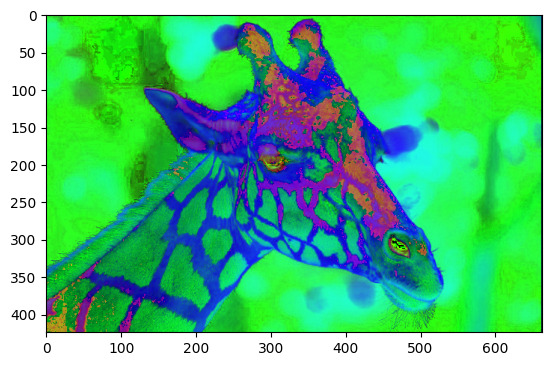

In [34]:
image = cv2.imread('../image2.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(image)

In [65]:
lower_white = np.array([2,0,0])
upper_white = np.array([229,25,200])

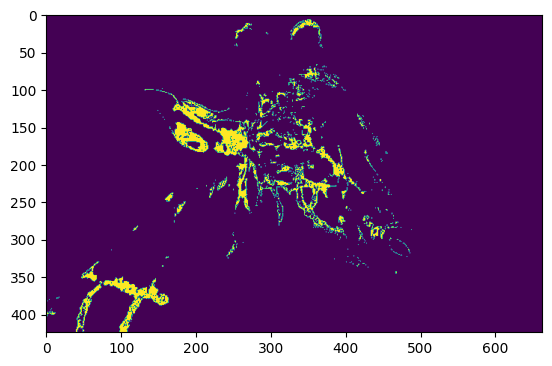

In [66]:
mask = cv2.inRange(image, lower_white, upper_white)
plt.imshow(mask)

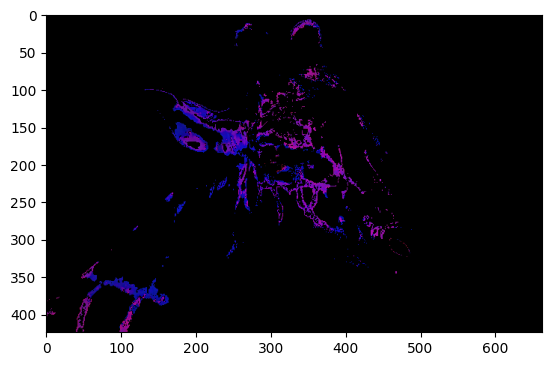

In [67]:
result = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(result)

In [31]:
black_hsv = np.uint8([[[120,255,0]]])
black_bgr = cv2.cvtColor(black_hsv, cv2.COLOR_HSV2BGR)


In [32]:
image_result = image.copy()
image_result[mask>0] = black_bgr
image_result_rgb = cv2.cvtColor(image_result,cv2.COLOR_BGR2RGB)

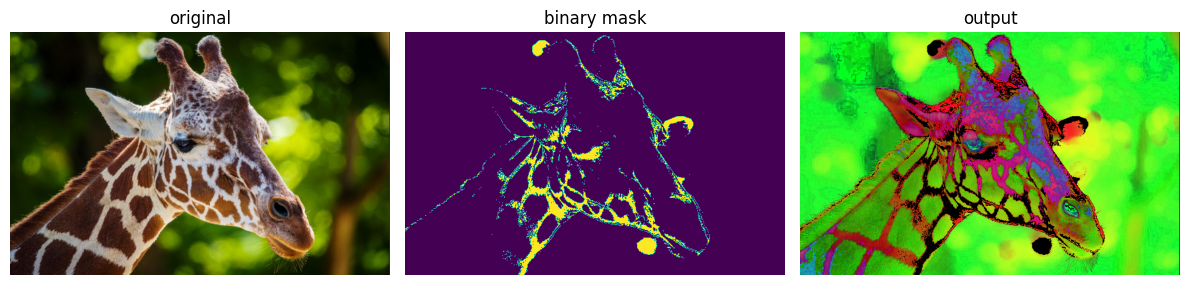

In [38]:
# plot
fig ,axs = plt.subplots(1,3,figsize=(12,6))
axs[0].imshow(image_rgb)
axs[0].set_title('original')
axs[0].axis('off')

axs[1].imshow(mask)
axs[1].set_title('binary mask')
axs[1].axis('off')

axs[2].imshow(image_result_rgb)
axs[2].set_title('output')
axs[2].axis('off')

plt.tight_layout()
plt.show()

In [2]:
import cv2
import matplotlib.pyplot as plt

In [5]:
image = cv2.imread('../image2.png')

In [6]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [7]:
print(image_rgb.shape)

(424, 663, 3)


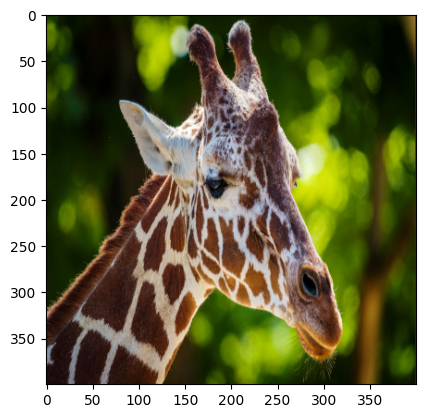

In [8]:
new_height, new_width = 400, 400
resized_image = cv2.resize(image_rgb, (new_width, new_height))
plt.imshow(resized_image)

(212, 331, 3)


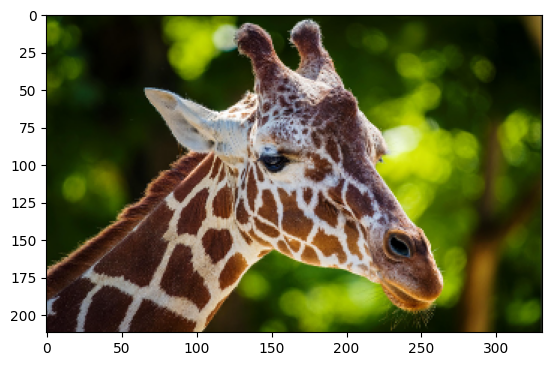

In [11]:
#image scaling
scale_percentage = 50
s_width = int(image_rgb.shape[1]*scale_percentage / 100)
s_height = int(image_rgb.shape[0]*scale_percentage / 100)
s_image = cv2.resize(image_rgb, (s_width, s_height), interpolation=cv2.INTER_CUBIC)
print(s_image.shape)
plt.imshow(s_image)

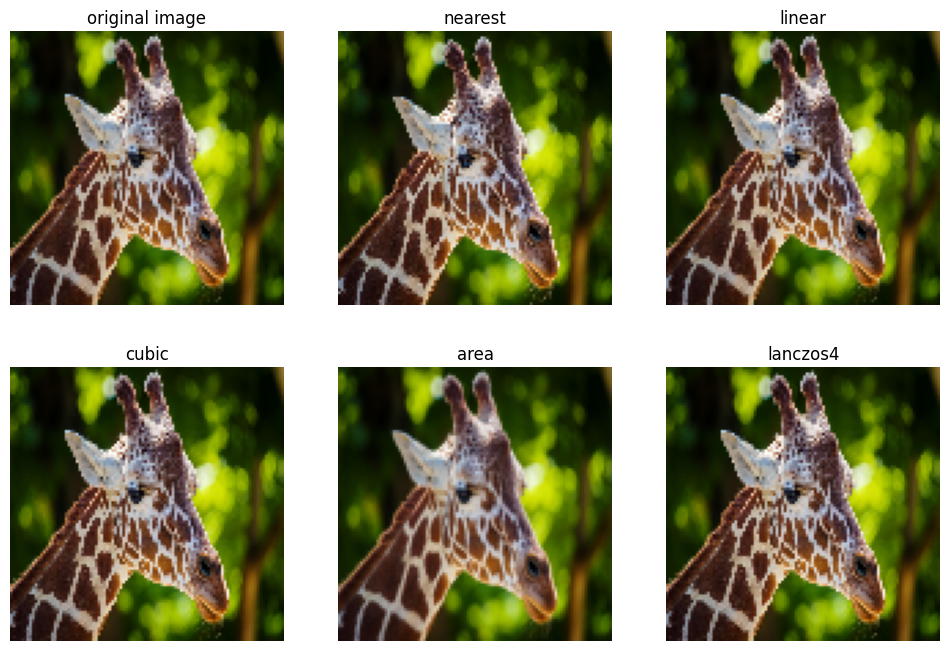

In [18]:
#interpolation
width = 100
height = 100
imagee = cv2.resize(image_rgb, (width, height))
# interpolation method
methods = {
    'nearest': cv2.INTER_NEAREST,
    'linear': cv2.INTER_LINEAR,
    'cubic': cv2.INTER_CUBIC,
    'area': cv2.INTER_AREA,
    'lanczos4': cv2.INTER_LANCZOS4
}

resized_images = {}
for name, method in methods.items():
    resized_images[name] = cv2.resize(image_rgb, (width, height), interpolation=method)
    cv2.imwrite(f'../name.png', resized_images[name])

plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.imshow(imagee)
plt.title('original image')
plt.axis("off")

for i, (name, image) in enumerate(resized_images.items(), start=2):
    plt.subplot(2,3,i)
    plt.imshow(image)
    plt.title(name)
    plt.axis('off')


In [19]:
image = cv2.imread("../image1.png")
print(image)

[[[ 45  33  20]
  [ 49  36  23]
  [ 53  40  28]
  ...
  [ 43  54  62]
  [ 46  57  65]
  [ 48  59  67]]

 [[ 49  37  27]
  [ 53  41  31]
  [ 56  44  34]
  ...
  [ 50  61  70]
  [ 48  59  67]
  [ 44  55  64]]

 [[ 54  44  35]
  [ 56  46  37]
  [ 63  53  44]
  ...
  [ 54  65  73]
  [ 49  61  69]
  [ 45  56  64]]

 ...

 [[  7  94   8]
  [  0 114   0]
  [  0 138   0]
  ...
  [  6  53   8]
  [  0  56   1]
  [  0  49   0]]

 [[  0  93   0]
  [  0 110   0]
  [  0 138   0]
  ...
  [  8  59   8]
  [  9  68   8]
  [  0  47   0]]

 [[  3  96   4]
  [  1 110   2]
  [  0 131   1]
  ...
  [  5  51   4]
  [  2  53   0]
  [  0  43   0]]]


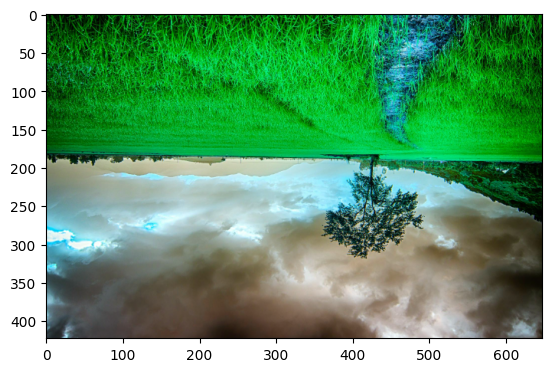

In [ ]:
# flipping
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
horizontal = cv2.flip(image_rgb, 1)
vertical = cv2.flip(image_rgb,0)
both = cv2.flip(image_rgb, -1)
new = cv2.cvtColor(both, cv2.COLOR_BGR2RGB)
plt.imshow(new)

(-0.5, 647.5, 422.5, -0.5)

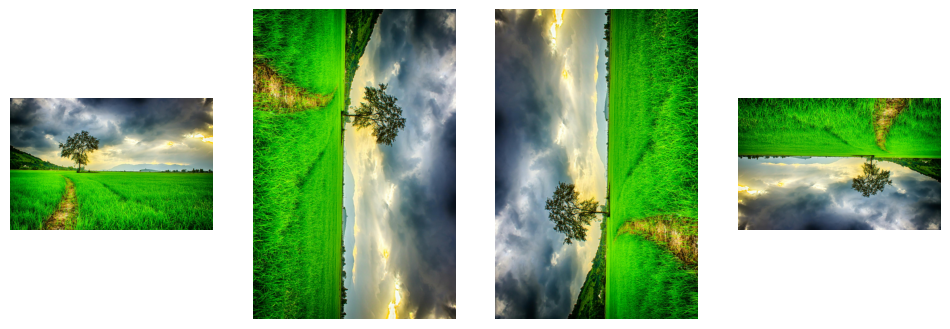

In [27]:
#rotation
rot_image_90 = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)
rot_image_9Oz = cv2.rotate(image_rgb, cv2.ROTATE_90_COUNTERCLOCKWISE)
rot_image180 = cv2.rotate(image_rgb, cv2.ROTATE_180)

plt.figure(figsize=(12,8))
plt.subplot(1,4,1)
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(rot_image_90)
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(rot_image_9Oz)
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(rot_image180)
plt.axis('off')



In [28]:
# cropping

print(image_rgb.shape)

(423, 648, 3)


(-0.5, 199.5, 122.5, -0.5)

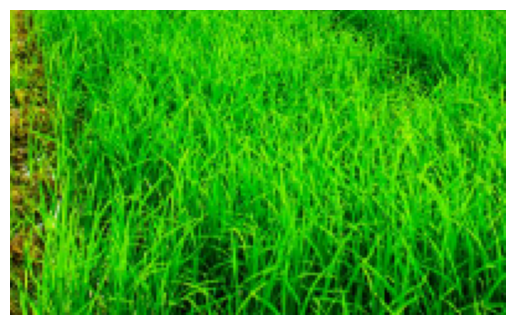

In [30]:
x_start, y_start = 200, 300
x_end, y_end = 400, 600

cropped = image_rgb[y_start:y_end, x_start:x_end]
plt.imshow(cropped)
plt.axis('off')

In [31]:
# drawing lines and shapes using opencv
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [40]:
width, height = 400, 600
blue = (255,127,0)
canvas = np.full((height, width, 3), blue, dtype=np.uint8)
canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

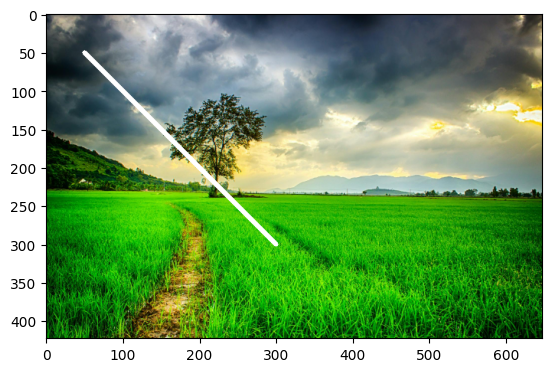

In [54]:
# DRAW a line 
im = cv2.line(image_rgb,(50,50),(300,300), (255,255,255), 5)
plt.imshow(im)

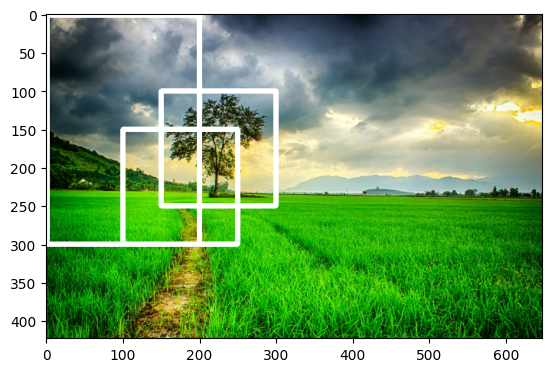

In [56]:
# DRAW A RECTANGLE
r = cv2.rectangle(image,(150, 100),(300, 250),(255,255,255), 5)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))

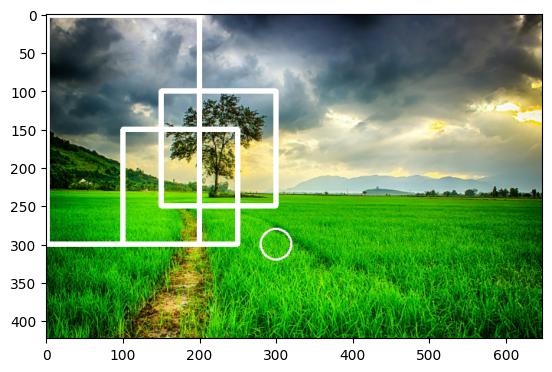

In [60]:
# draw a circle
circle = cv2.circle(image, (300,300),20, (255,225,255),2)
plt.imshow(cv2.cvtColor(circle, cv2.COLOR_BGR2RGB))

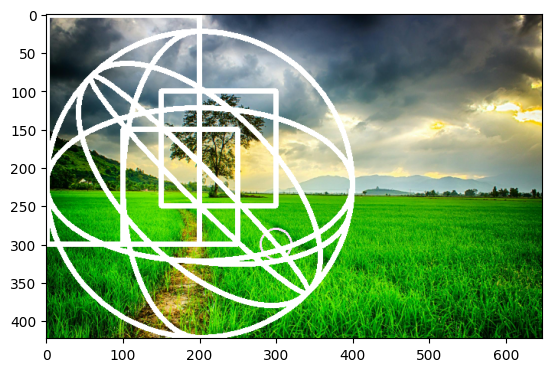

In [70]:
# draw ellipse 
ellipse = cv2.ellipse(image,(200,222),(200,100),90,180, 90, (255,255,255),5)
plt.imshow(cv2.cvtColor(ellipse, cv2.COLOR_BGR2RGB))

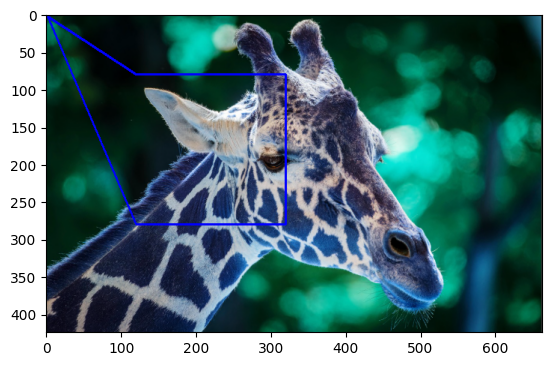

In [78]:
image = cv2.imread('../image2.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
x, y, w, h = 120, 80, 200, 200

pts = np.array([
    [x, y],
    [x + w, y],
    [x + w, y + h],
    [x, y + h],
    [2,3]
], np.int32)

pts = pts.reshape((-1, 1, 2))

polygon = cv2.polylines(image_rgb, [pts], True, (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(polygon, cv2.COLOR_BGR2RGB))

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



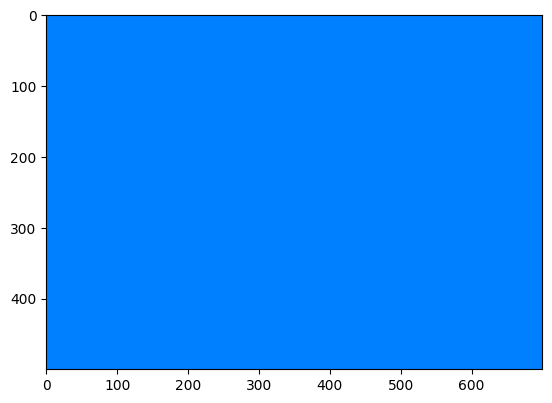

In [81]:
height, width = 500, 700
sky_blue = (255, 127,0)
canvas = np.full((height, width, 3), sky_blue, dtype=np.uint8)
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

True

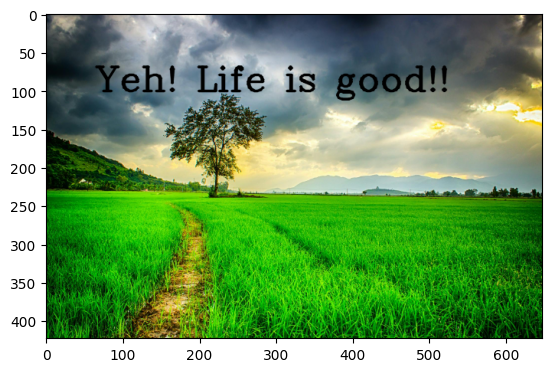

In [92]:
image2 = cv2.imread('../image1.png')
text =" Yeh! Life is good!!"
font = cv2.FONT_HERSHEY_COMPLEX
org = (40,100)
font_scale = 1.5
color = (0, 0, 0)
thickness = 2
imagge = cv2.putText(image2, text, org, font, font_scale, color, thickness,cv2.LINE_AA)
plt.imshow(cv2.cvtColor(imagge,cv2.COLOR_BGR2RGB))
cv2.imwrite("../image_good.png",imagge)